Advanced Tricks
===

So you've tried making normal waveforms and now you need to spice up your life by making some way more weird waveforms letting the detector be whatever you want it to be? 
You have come to the right place!

By default fax uses some configuration file which is a huge pain to modify. So we made fax such that if you add a parameter in the instruction which corresponds to a parameter in the config it will overwrite what the value was in the config and let you deside what it should be!

This example shows how to modify the electron lifetime and the anode voltage

In [1]:
import numpy as np
import strax
import straxen
import wfsim

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from multihist import Histdd, Hist1d
from scipy import stats

In [2]:
st = strax.Context(
    register=wfsim.RawRecordsFromFax,
#     config=dict(detector="XENONnT"),
    **straxen.contexts.common_opts)

In [3]:
# Just some id from post-SR1, so the corrections work
run_id = '180519_1901'

In [4]:
strax.Mailbox.DEFAULT_TIMEOUT=10000

In [5]:
dtype = wfsim.strax_interface.instruction_dtype
# dtype.extend(('electron_lifetime_liquid',np.int),)

In [6]:
def rand_instructions(c):
    n = c['nevents'] = c['event_rate'] * c['chunk_size'] * c['nchunk']
    c['total_time'] = c['chunk_size'] * c['nchunk']

    instructions = np.zeros(n, dtype=dtype)
    uniform_times = c['total_time'] * (np.arange(n) + 0.5) / n
    instructions['t'] = uniform_times * int(1e9)
    instructions['event_number'] = np.digitize(instructions['t'], 
         1e9 * np.arange(c['nchunk']) * c['chunk_size']) - 1
    instructions['type'] = 's1'
    instructions['recoil'] = ['er' for i in range(n)]

    r = np.sqrt(np.random.uniform(0, 2500, n))
    t = np.random.uniform(-np.pi, np.pi, n)
    instructions['x'] = r * np.cos(t)
    instructions['y'] = r * np.sin(t)
    instructions['z'] = np.random.uniform(-100, 0, n)
    
    nphotons = np.random.uniform(5e1,1e6,n)
    nelectrons = np.tile(np.random.normal(5e3, 1e2,int(n/10)).astype(int),10)
    instructions['amp'] = nphotons
#     instructions['electron_lifetime_liquid'] = np.repeat([100e3,200e3,300e3,400e3,500e3,600e3,700e3,800e3,900e3,1000e3],n/10)
    return instructions

In [ ]:
# def rand_instructions(c):
#     n = c['nevents'] = c['event_rate'] * c['chunk_size'] * c['nchunk']
#     c['total_time'] = c['chunk_size'] * c['nchunk']

#     instructions = np.zeros(2 * n, dtype=dtype)
#     uniform_times = c['total_time'] * (np.arange(n) + 0.5) / n
#     instructions['t'] = np.repeat(uniform_times, 2) * int(1e9)
#     instructions['event_number'] = np.digitize(instructions['t'], 
#          1e9 * np.arange(c['nchunk']) * c['chunk_size']) - 1
#     instructions['type'] = np.tile(['s1', 's2'], n)
#     instructions['recoil'] = ['er' for i in range(n * 2)]

#     r = np.sqrt(np.random.uniform(0, 2500, n))
#     t = np.random.uniform(-np.pi, np.pi, n)
#     instructions['x'] = np.repeat(r * np.cos(t), 2)
#     instructions['y'] = np.repeat(r * np.sin(t), 2)
#     instructions['z'] = np.repeat(np.random.uniform(-100, 0, n), 2)

#     nphotons = np.random.uniform(5e1, 1e7, n)
#     nelectrons = 10 ** (np.random.uniform(1, 1, n))
#     instructions['amp'] = np.vstack([nphotons, nelectrons]).T.flatten().astype(int)

#     return instructions

In [7]:
wfsim.strax_interface.rand_instructions = rand_instructions

In [8]:
st.set_config(dict(fax_file=None))
st.set_config(dict(nchunk=1, event_rate = 1, chunk_size = 1000))

In [9]:
run_ids =['00000','00001','00002','00003','00004','00005','00006','00007','00008','00009',
#           '00010','00011','00012','00013','00014','00015','00016','00017','00018','00019',
#           '00020','00021','00022','00023','00024','00025','00026','00027','00028','00029',
#           '00030','00031','00032','00033','00034','00035','00036','00037','00038','00039',
#           '00040','00041','00042','00043','00044','00045','00046','00047','00048','00049',
         ]

In [10]:
for run_id in run_ids:
    st.make(run_id,'records')

Removing old incomplete data in ./strax_data/00000-raw_records-s5wloh53a6
Removing old incomplete data in ./strax_data/00000-truth-s5wloh53a6
Removing old incomplete data in ./strax_data/00000-pulse_counts-2ynoray5hr
Removing old incomplete data in ./strax_data/00000-aqmon_records-2ynoray5hr
Removing old incomplete data in ./strax_data/00000-diagnostic_records-2ynoray5hr
Removing old incomplete data in ./strax_data/00000-veto_regions-2ynoray5hr
Removing old incomplete data in ./strax_data/00000-records-2ynoray5hr
Removing old incomplete data in ./strax_data/00000-peaks-3rawoihilv
Removing old incomplete data in ./strax_data/00000-peak_basics-lmc7hgfdtn


Simulating Raw Records: 100%|██████████| 1000/1000 [06:36<00:00,  2.54it/s]


Source finished!


Simulating Raw Records:   2%|▏         | 15/1000 [00:05<06:04,  2.70it/s]

KeyboardInterrupt: 

In [1]:
# Remove any previously simulated data, if such exists
!rm -r strax_data

# records = st.get_array(run_id,'raw_records')
# peaks = st.get_array(run_id, ['peaks','peak_classification'])
# data = st.get_df(run_ids[0], 'peak_basics')

# truth = st.get_df(run_ids[0], 'truth')
# st.waveform_display(run_id)

In [12]:
# data = st.get_df(run_ids,'peak_basics')
# peaks = st.get_array(run_ids,'peaks')
# truth = st.get_df(run_ids,'truth')

In [13]:
records = st.get_array(run_ids[0],'raw_records')

Simulating Raw Records:   6%|▌         | 61/1000 [00:23<05:01,  3.12it/s]

In [ ]:
itvs = np.load('./itvs.npy')

In [14]:
records['baseline']

array([16000., 16000., 16000., ..., 16000., 15998., 16000.], dtype=float32)

Simulating Raw Records:   7%|▋         | 67/1000 [00:26<07:12,  2.16it/s]

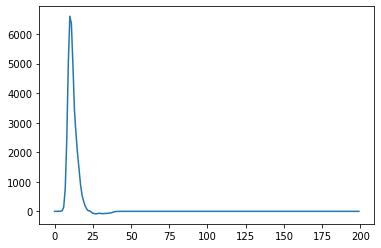

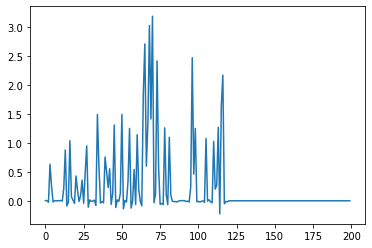

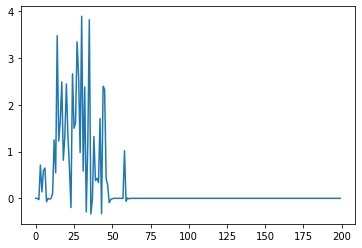

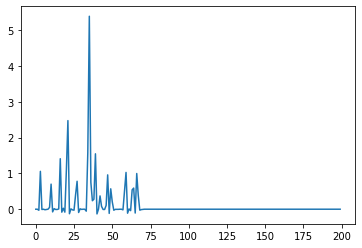

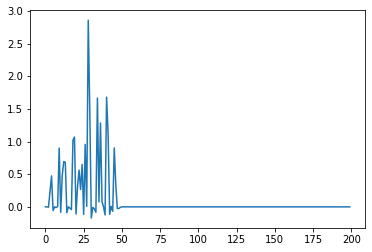

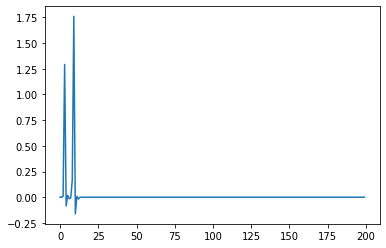

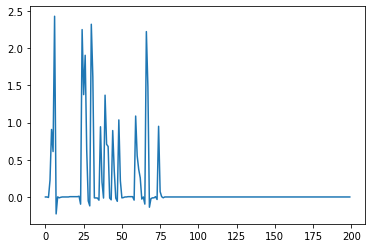

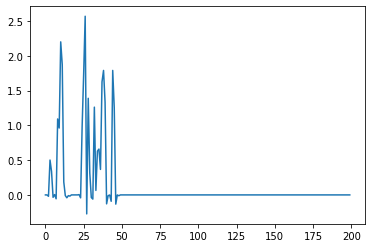

Simulating Raw Records:  23%|██▎       | 229/1000 [01:32<10:59,  1.17it/s]

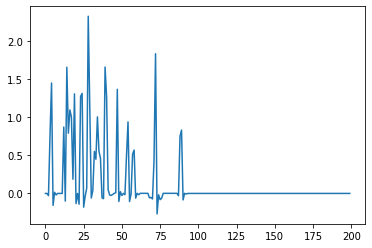

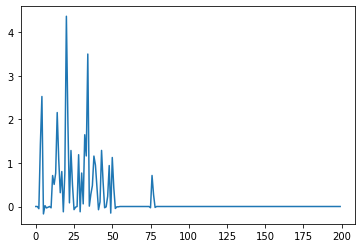

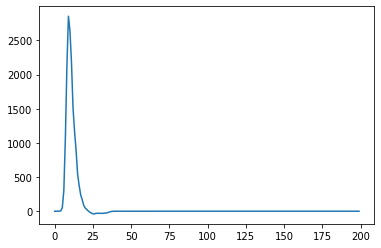

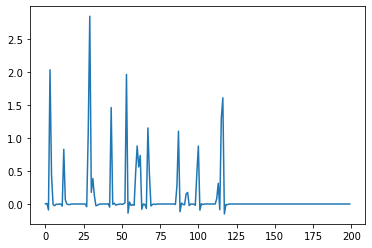

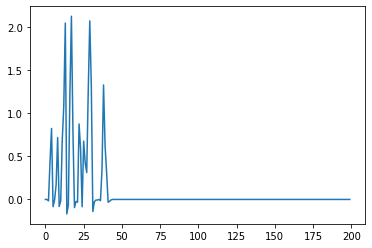

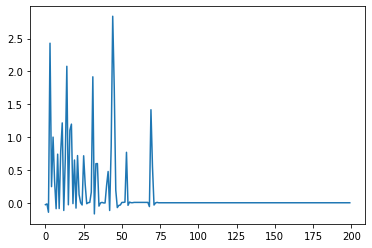

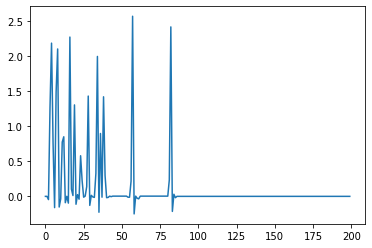

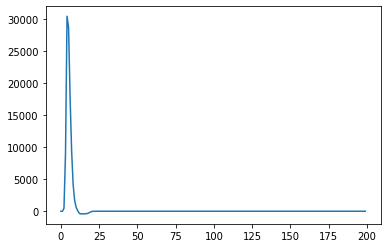

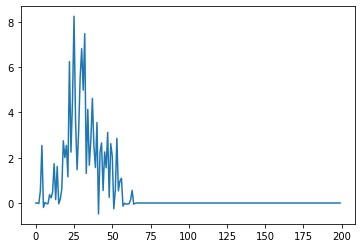

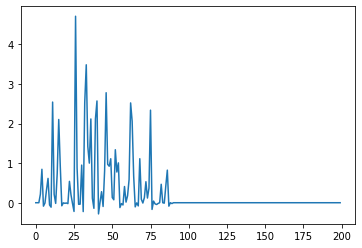

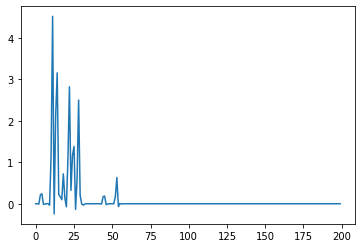

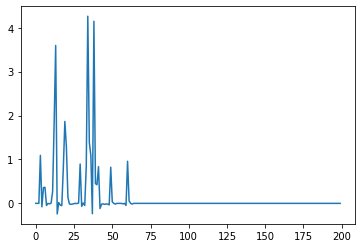

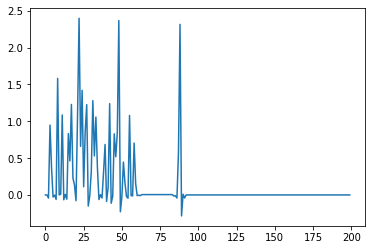

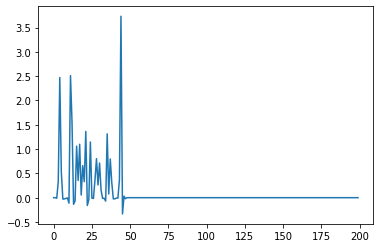

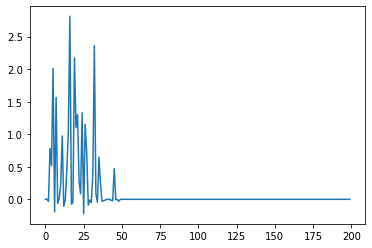

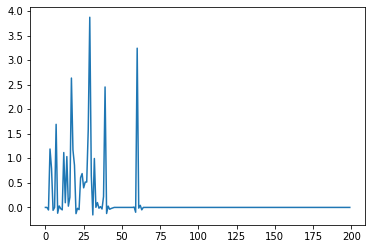

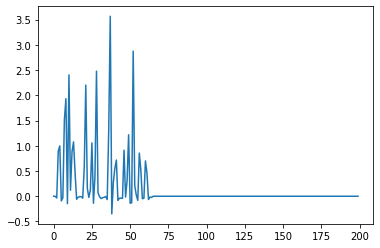

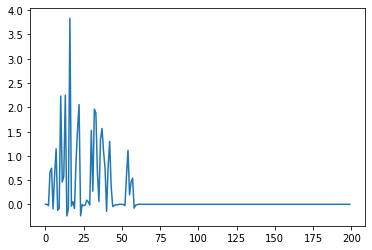

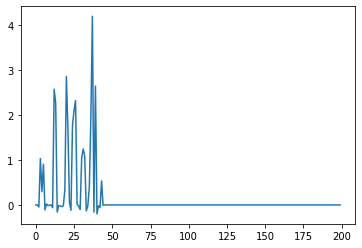

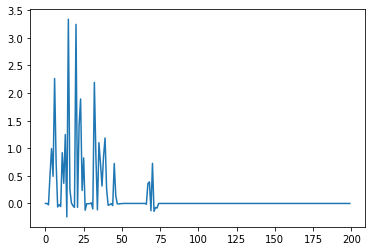

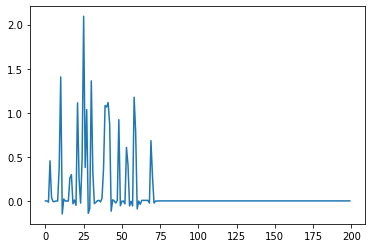

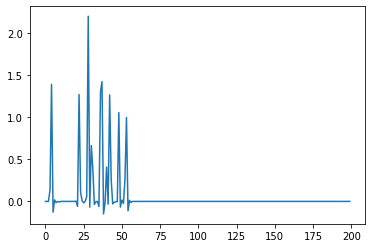

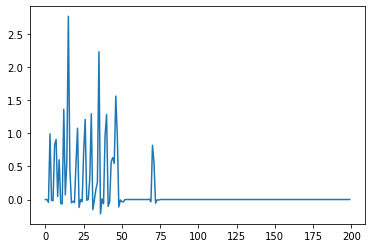

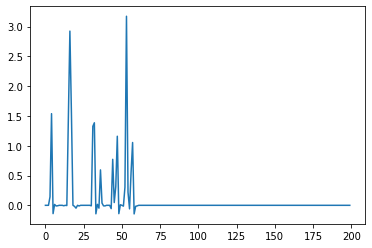

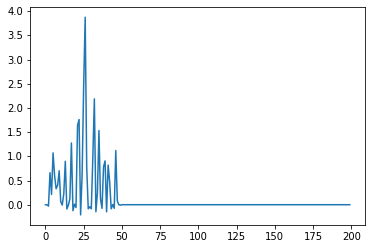

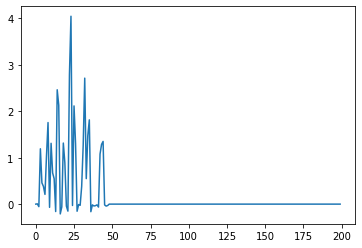

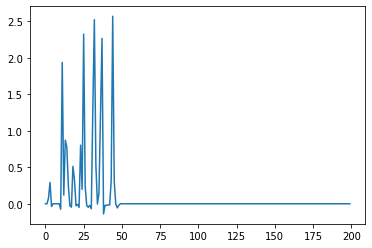

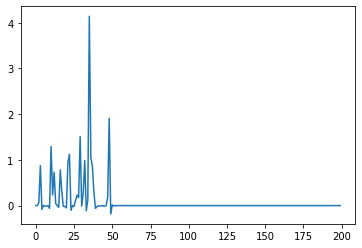

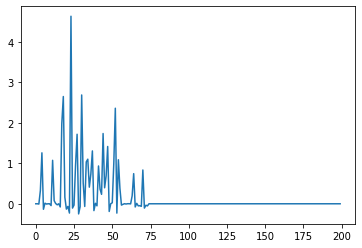

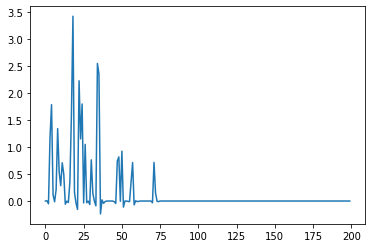

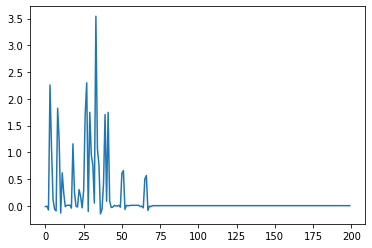

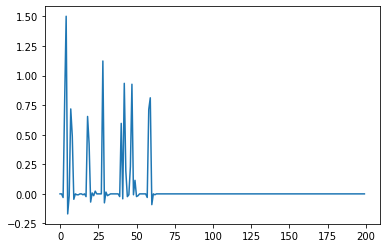

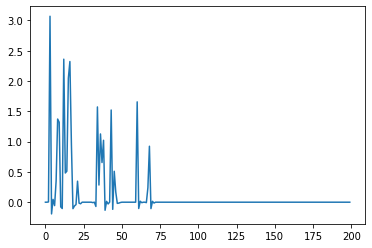

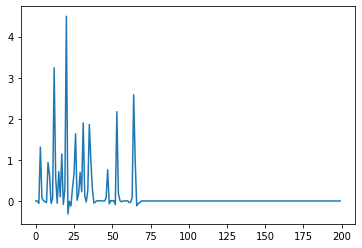

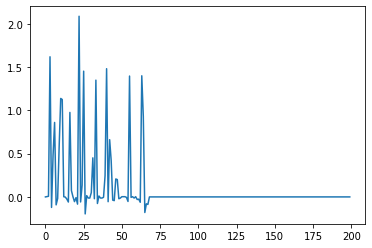

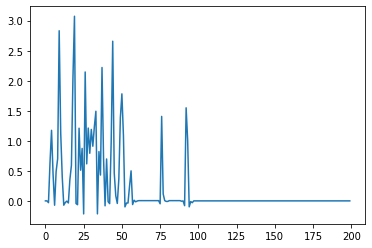

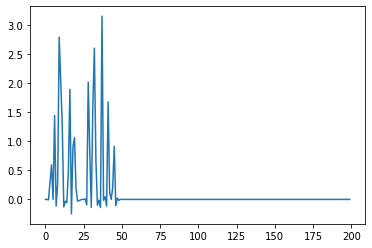

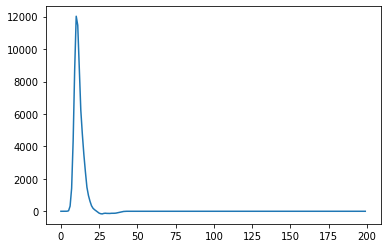

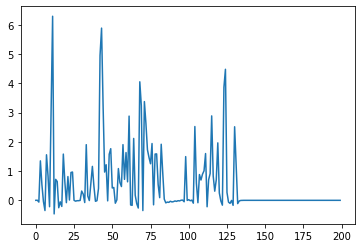

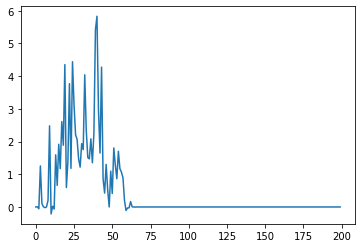

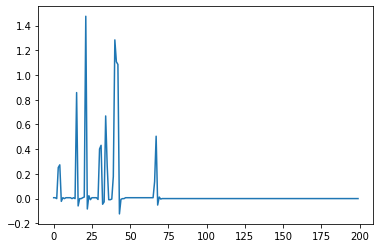

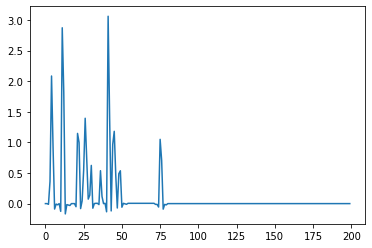

Simulating Raw Records:  31%|███       | 310/1000 [02:10<05:09,  2.23it/s]

In [20]:
for r in peaks[:50]:
    plt.plot(r['data'])
    plt.show()

In [17]:
peaks =st.get_array(run_ids[0],'peaks')

Simulating Raw Records:  13%|█▎        | 133/1000 [00:51<05:48,  2.49it/s]

In [21]:
data

,time,endtime,area,n_channels,max_pmt,max_pmt_area,range_50p_area,area_fraction_top,length,dt
0,499999950,500000770,36968.546875,212,68,301,32.746181,0.343121,82,10
1,500001060,500002260,46.036106,12,243,11,447.695557,0.263904,120,10
2,500002810,500003430,53.112099,18,31,12,164.007507,1.000000,62,10
3,500023080,500023790,22.925581,15,141,3,207.026154,0.662382,71,10
4,500029180,500029680,18.627590,6,75,6,168.728241,1.000000,50,10
5,500029920,500030050,2.967480,2,85,1,59.125397,1.000000,13,10
6,500078140,500078920,26.569792,16,177,4,244.480453,0.052693,78,10
7,500152340,500152830,23.928080,15,224,3,263.471130,0.000000,49,10
8,500186400,500187330,27.000702,15,92,5,235.485672,1.000000,93,10
9,500591810,500592620,35.585999,20,49,3,189.290573,1.000000,81,10


Simulating Raw Records: 100%|██████████| 1000/1000 [06:42<00:00,  2.95it/s]


Source finished!


In [ ]:
plt.plot(peaks[peaks['area']<50]['data'][0])

In [ ]:
data[data['area']<50]['data']
# truth[truth['n_photon']<1e3]

In [ ]:
plt.plot(data['data'][0].T)

In [ ]:
data[['area','n_channels']]

In [ ]:
pb = st.get_df(run_id,['peak_basics'])

In [ ]:
pb = pb[pb['area']>50]

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
fig = plt.figure()
ax = fig.add_subplot()
plt.hist(pb[:500]['area'],bins=20,histtype='bar',label='100e3')
plt.hist(pb[500:1000]['area'],bins=20,histtype='bar',label='200e3')
plt.hist(pb[1000:1500]['area'],bins=20,histtype='bar',label='300e3')
plt.hist(pb[1500:2000]['area'],bins=20,histtype='bar',label='400e3')
plt.hist(pb[2000:2500]['area'],bins=20,histtype='bar',label='500e3')
plt.hist(pb[2500:3000]['area'],bins=20,histtype='bar',label='600e3')
plt.hist(pb[3000:3500]['area'],bins=20,histtype='bar',label='700e3')
plt.hist(pb[3500:4000]['area'],bins=20,histtype='bar',label='800e3')
plt.hist(pb[4000:4500]['area'],bins=20,histtype='bar',label='900e3')
plt.hist(pb[4500:5000]['area'],bins=20,histtype='bar',label='1000e3')
plt.legend(prop={'size': 10})
plt.title('S2 area for different electron lifetimes')

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
x_multi = [truth[:500]['n_electron'],truth[500:1000]['n_electron'],truth[1000:1500]['n_electron'],truth[1500:2000]['n_electron'],truth[2000:2500]['n_electron']\
         ,truth[2500:3000]['n_electron'],truth[3000:3500]['n_electron'],truth[3500:4000]['n_electron'],truth[4000:4500]['n_electron'],truth[4500:5000]['n_electron'],]
labels = ['100e3','200e3','300e3','400e3','500e3','600e3','700e3','800e3','900e3','1000e3']

fig, axes = plt.subplots(nrows=5, ncols=2)
ax0, ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9 = axes.flatten()
axes = [ax0, ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(10):
    axes[i].hist(x_multi[i],bins=20,label=labels[i],density=True)
    axes[i].set_ylim(0,0.002)
    axes[i].legend()

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
x_multi = [pb[:500]['area'],pb[500:1000]['area'],pb[1000:1500]['area'],pb[1500:2000]['area'],pb[2000:2500]['area']\
         ,pb[2500:3000]['area'],pb[3000:3500]['area'],pb[3500:4000]['area'],pb[4000:4500]['area'],pb[4500:5000]['area'],]
labels = ['100e3','200e3','300e3','400e3','500e3','600e3','700e3','800e3','900e3','1000e3']

fig, axes = plt.subplots(nrows=5, ncols=2)
ax0, ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9 = axes.flatten()
axes = [ax0, ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(10):
    axes[i].hist(x_multi[i],bins=20,label=labels[i],density=True)
    axes[i].set_ylim(0,0.00015)
    axes[i].legend()